<a href="https://colab.research.google.com/github/janhavi-lab/GreenTechi/blob/main/Electricity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


In [18]:
df = pd.read_csv('/content/hostel_energy_realistic_final2.csv')

In [19]:
 df

,Room,Day,Time,Lights_W,Fan_W,Laptop_W,Heater_W,Total_Energy_W
0,1,1,1,14.421503,92.996286,13.164264,462.114196,582.696249
1,1,1,2,8.184624,91.298934,9.740024,469.896174,579.119756
2,1,1,3,9.822229,66.134157,8.265440,436.139968,520.361794
3,1,1,4,6.682700,77.350563,10.608562,470.399616,565.041442
4,1,1,5,10.333724,88.433302,18.641903,501.355955,618.764885
...,...,...,...,...,...,...,...,...
1675,10,7,20,96.714381,63.032994,68.588366,301.041463,529.377205
1676,10,7,21,93.607141,64.876355,36.704330,222.244402,417.432227
1677,10,7,22,56.011450,65.181527,39.120842,380.598591,540.912409
1678,10,7,23,72.037377,85.375021,13.794639,219.014778,390.221815


In [20]:
df.isnull().sum()

,0
Room,0
Day,0
Time,0
Lights_W,0
Fan_W,0
Laptop_W,0
Heater_W,0
Total_Energy_W,0


In [29]:
display(df.head())
display(df.info())
display(df.describe())

,Room,Day,Time,Lights_W,Fan_W,Laptop_W,Heater_W,Total_Energy_W
0,1,1,1,14.421503,92.996286,13.164264,462.114196,582.696249
1,1,1,2,8.184624,91.298934,9.740024,469.896174,579.119756
2,1,1,3,9.822229,66.134157,8.265440,436.139968,520.361794
3,1,1,4,6.682700,77.350563,10.608562,470.399616,565.041442
4,1,1,5,10.333724,88.433302,18.641903,501.355955,618.764885


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Room            1680 non-null   int64  
 1   Day             1680 non-null   int64  
 2   Time            1680 non-null   int64  
 3   Lights_W        1680 non-null   float64
 4   Fan_W           1680 non-null   float64
 5   Laptop_W        1680 non-null   float64
 6   Heater_W        1680 non-null   float64
 7   Total_Energy_W  1680 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 105.1 KB


None

,Room,Day,Time,Lights_W,Fan_W,Laptop_W,Heater_W,Total_Energy_W
count,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000
mean,5.500000,4.000000,12.500000,33.306577,117.789312,39.698638,249.210602,440.005129
std,2.873137,2.000596,6.924248,26.442500,37.791998,30.779711,170.925129,141.071184
min,1.000000,1.000000,1.000000,5.039644,60.012814,0.020787,50.324858,129.710309
25%,3.000000,2.000000,6.750000,12.864189,81.916079,10.653176,100.023151,324.043914
50%,5.500000,4.000000,12.500000,24.095856,124.497010,37.799787,175.213772,408.125461
75%,8.000000,6.000000,18.250000,42.443126,151.876937,65.838517,400.032055,559.307301
max,10.000000,7.000000,24.000000,99.801871,179.915163,99.937081,599.962340,810.196916


In [30]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

In [31]:
data_scaled = pd.DataFrame(data_scaled, columns=df_numeric.columns)

In [32]:
data_scaled

,Room,Day,Time,Lights_W,Fan_W,Laptop_W,Heater_W,Total_Energy_W
0,-1.566699,-1.5,-1.661325,-0.714407,-0.656234,-0.862330,1.245967,1.011784
1,-1.566699,-1.5,-1.516862,-0.950343,-0.701161,-0.973613,1.291509,0.986424
2,-1.566699,-1.5,-1.372399,-0.888393,-1.367235,-1.021535,1.093959,0.569787
3,-1.566699,-1.5,-1.227936,-1.007159,-1.070353,-0.945387,1.294455,0.886599
4,-1.566699,-1.5,-1.083473,-0.869044,-0.777010,-0.684315,1.475619,1.267537
...,...,...,...,...,...,...,...,...
1675,1.566699,1.5,1.083473,2.398664,-1.449318,0.938876,0.303328,0.633713
1676,1.566699,1.5,1.227936,2.281120,-1.400527,-0.097311,-0.157813,-0.160058
1677,1.566699,1.5,1.372399,0.858906,-1.392450,-0.018778,0.768916,0.715506
1678,1.566699,1.5,1.516862,1.465154,-0.857958,-0.841844,-0.176714,-0.353000


In [33]:
df.drop_duplicates()

,Room,Day,Time,Lights_W,Fan_W,Laptop_W,Heater_W,Total_Energy_W
0,1,1,1,14.421503,92.996286,13.164264,462.114196,582.696249
1,1,1,2,8.184624,91.298934,9.740024,469.896174,579.119756
2,1,1,3,9.822229,66.134157,8.265440,436.139968,520.361794
3,1,1,4,6.682700,77.350563,10.608562,470.399616,565.041442
4,1,1,5,10.333724,88.433302,18.641903,501.355955,618.764885
...,...,...,...,...,...,...,...,...
1675,10,7,20,96.714381,63.032994,68.588366,301.041463,529.377205
1676,10,7,21,93.607141,64.876355,36.704330,222.244402,417.432227
1677,10,7,22,56.011450,65.181527,39.120842,380.598591,540.912409
1678,10,7,23,72.037377,85.375021,13.794639,219.014778,390.221815


In [35]:
data_scaled

,Room,Day,Time,Lights_W,Fan_W,Laptop_W,Heater_W,Total_Energy_W
0,-1.566699,-1.5,-1.661325,-0.714407,-0.656234,-0.862330,1.245967,1.011784
1,-1.566699,-1.5,-1.516862,-0.950343,-0.701161,-0.973613,1.291509,0.986424
2,-1.566699,-1.5,-1.372399,-0.888393,-1.367235,-1.021535,1.093959,0.569787
3,-1.566699,-1.5,-1.227936,-1.007159,-1.070353,-0.945387,1.294455,0.886599
4,-1.566699,-1.5,-1.083473,-0.869044,-0.777010,-0.684315,1.475619,1.267537
...,...,...,...,...,...,...,...,...
1675,1.566699,1.5,1.083473,2.398664,-1.449318,0.938876,0.303328,0.633713
1676,1.566699,1.5,1.227936,2.281120,-1.400527,-0.097311,-0.157813,-0.160058
1677,1.566699,1.5,1.372399,0.858906,-1.392450,-0.018778,0.768916,0.715506
1678,1.566699,1.5,1.516862,1.465154,-0.857958,-0.841844,-0.176714,-0.353000


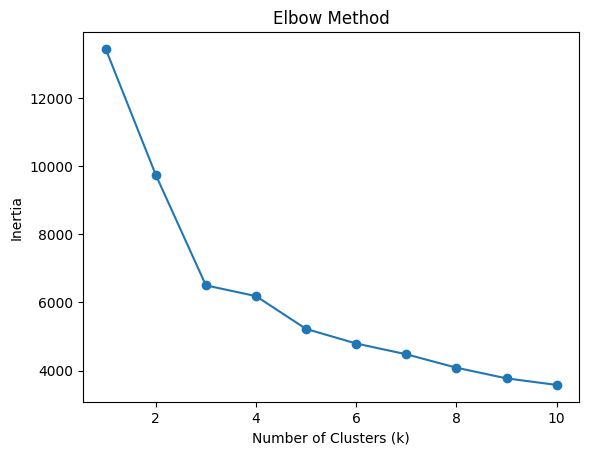

In [36]:
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [37]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
df["cluster"] = kmeans.fit_predict(data_scaled)
df

,Room,Day,Time,Lights_W,Fan_W,Laptop_W,Heater_W,Total_Energy_W,cluster
0,1,1,1,14.421503,92.996286,13.164264,462.114196,582.696249,0
1,1,1,2,8.184624,91.298934,9.740024,469.896174,579.119756,0
2,1,1,3,9.822229,66.134157,8.265440,436.139968,520.361794,0
3,1,1,4,6.682700,77.350563,10.608562,470.399616,565.041442,0
4,1,1,5,10.333724,88.433302,18.641903,501.355955,618.764885,0
...,...,...,...,...,...,...,...,...,...
1675,10,7,20,96.714381,63.032994,68.588366,301.041463,529.377205,2
1676,10,7,21,93.607141,64.876355,36.704330,222.244402,417.432227,2
1677,10,7,22,56.011450,65.181527,39.120842,380.598591,540.912409,2
1678,10,7,23,72.037377,85.375021,13.794639,219.014778,390.221815,2


In [38]:
sil_score = silhouette_score(data_scaled, df["cluster"])
print(f"The Sillout score is {sil_score}")

The Sillout score is 0.3796155216446729


In [39]:
import seaborn as sns

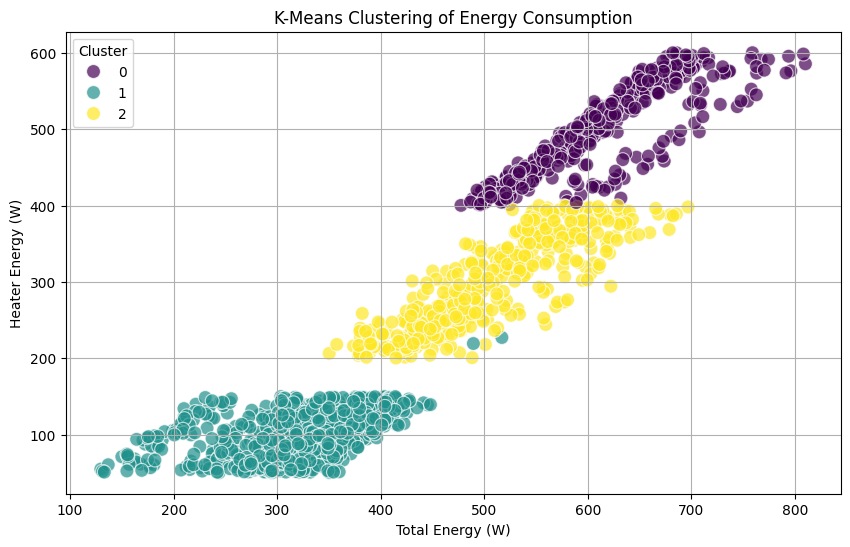

In [40]:
# Generate a scatter plot to visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Total_Energy_W", y="Heater_W", hue="cluster", data=df, palette='viridis', s=100, alpha=0.7, edgecolor='w')

plt.title('K-Means Clustering of Energy Consumption')
plt.xlabel('Total Energy (W)')
plt.ylabel('Heater Energy (W)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [42]:
# Analyze the characteristics of each cluster by grouping by the cluster column and calculating the mean
cluster_analysis = df.groupby('cluster').mean()

# Display the cluster analysis
display(cluster_analysis)

,Room,Day,Time,Lights_W,Fan_W,Laptop_W,Heater_W,Total_Energy_W
cluster,,,,,,,,
0,5.500000,4.000000,3.500000,12.343431,91.765410,9.900190,496.106435,610.115467
1,5.495249,4.002375,13.011876,23.091929,144.004031,52.953426,100.444706,320.494092
2,5.509569,3.995215,20.511962,74.945944,91.132005,42.939824,300.800639,509.818412
